# Analysing Google Merchandise Store Website Performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing and Cleaning

In [2]:
data = pd.read_csv('gadata.csv')

In [3]:
data.head()

,Unnamed: 0,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,...,user_ltv,device,geo,app_info,traffic_source,stream_id,platform,event_dimensions,ecommerce,items
0,0,20210131,1612069510766593,page_view,"[{'key': 'gclid', 'value': {'string_value': No...",NaN,NaN,6595101026,NaN,NaN,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]
1,1,20210131,1612069529243877,scroll,"[{'key': 'debug_mode', 'value': {'string_value...",NaN,NaN,9011338476,NaN,NaN,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]
2,2,20210131,1612069515781635,page_view,"[{'key': 'debug_mode', 'value': {'string_value...",NaN,NaN,-6830522854,NaN,NaN,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]
3,3,20210131,1612069530073506,user_engagement,"[{'key': 'page_location', 'value': {'string_va...",NaN,NaN,-8264942910,NaN,NaN,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]
4,4,20210131,1612069510766593,session_start,"[{'key': 'ga_session_number', 'value': {'strin...",NaN,NaN,6595101026,NaN,NaN,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]


## Removing Columns

In [4]:
# remove duplicate index column
data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [5]:
data.head()

,event_date,event_timestamp,event_name,event_params,event_previous_timestamp,event_value_in_usd,event_bundle_sequence_id,event_server_timestamp_offset,user_id,user_pseudo_id,...,user_ltv,device,geo,app_info,traffic_source,stream_id,platform,event_dimensions,ecommerce,items
0,20210131,1612069510766593,page_view,"[{'key': 'gclid', 'value': {'string_value': No...",NaN,NaN,6595101026,NaN,NaN,1.026454e+06,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]
1,20210131,1612069529243877,scroll,"[{'key': 'debug_mode', 'value': {'string_value...",NaN,NaN,9011338476,NaN,NaN,1.026454e+06,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]
2,20210131,1612069515781635,page_view,"[{'key': 'debug_mode', 'value': {'string_value...",NaN,NaN,-6830522854,NaN,NaN,1.026454e+06,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]
3,20210131,1612069530073506,user_engagement,"[{'key': 'page_location', 'value': {'string_va...",NaN,NaN,-8264942910,NaN,NaN,1.026454e+06,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]
4,20210131,1612069510766593,session_start,"[{'key': 'ga_session_number', 'value': {'strin...",NaN,NaN,6595101026,NaN,NaN,1.026454e+06,...,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...",NaN,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,NaN,"{'total_item_quantity': None, 'purchase_revenu...",[]


In [6]:
data.columns

Index(['event_date', 'event_timestamp', 'event_name', 'event_params',
       'event_previous_timestamp', 'event_value_in_usd',
       'event_bundle_sequence_id', 'event_server_timestamp_offset', 'user_id',
       'user_pseudo_id', 'privacy_info', 'user_properties',
       'user_first_touch_timestamp', 'user_ltv', 'device', 'geo', 'app_info',
       'traffic_source', 'stream_id', 'platform', 'event_dimensions',
       'ecommerce', 'items'],
      dtype='object')

In [7]:
data['event_previous_timestamp'].unique()

array([nan])

In [8]:
data['event_value_in_usd'].unique()

array([nan])

In [9]:
data.isnull().sum() # number of null values in each column

event_date                           0
event_timestamp                      0
event_name                           0
event_params                         0
event_previous_timestamp         26489
event_value_in_usd               26489
event_bundle_sequence_id             0
event_server_timestamp_offset    26489
user_id                          26489
user_pseudo_id                       0
privacy_info                         0
user_properties                      0
user_first_touch_timestamp         958
user_ltv                             0
device                               0
geo                                  0
app_info                         26489
traffic_source                       0
stream_id                            0
platform                             0
event_dimensions                 26489
ecommerce                            0
items                                0
dtype: int64

In [10]:
data.shape

(26489, 23)

This shows that columns event_dimensions,app_info,user_id,event_server_timestamp_offset, event_previous_timestamp,event_value_in_usd are all empty, hence they need to be droppped.Similarly event_value_in_usd is almost empty, the values available are not enough to provide sound results, hence that column needs to be dropped

In [11]:
data.drop(['event_dimensions', 'app_info', 'user_id', 'event_server_timestamp_offset', 'event_previous_timestamp',
          'event_value_in_usd'], axis=1, inplace=True)
data.columns

Index(['event_date', 'event_timestamp', 'event_name', 'event_params',
       'event_bundle_sequence_id', 'user_pseudo_id', 'privacy_info',
       'user_properties', 'user_first_touch_timestamp', 'user_ltv', 'device',
       'geo', 'traffic_source', 'stream_id', 'platform', 'ecommerce', 'items'],
      dtype='object')

As visible, the selected columns are dropped

In [12]:
data.head(5)

,event_date,event_timestamp,event_name,event_params,event_bundle_sequence_id,user_pseudo_id,privacy_info,user_properties,user_first_touch_timestamp,user_ltv,device,geo,traffic_source,stream_id,platform,ecommerce,items
0,20210131,1612069510766593,page_view,"[{'key': 'gclid', 'value': {'string_value': No...",6595101026,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",[],1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]
1,20210131,1612069529243877,scroll,"[{'key': 'debug_mode', 'value': {'string_value...",9011338476,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",[],1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]
2,20210131,1612069515781635,page_view,"[{'key': 'debug_mode', 'value': {'string_value...",-6830522854,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",[],1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]
3,20210131,1612069530073506,user_engagement,"[{'key': 'page_location', 'value': {'string_va...",-8264942910,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",[],1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]
4,20210131,1612069510766593,session_start,"[{'key': 'ga_session_number', 'value': {'strin...",6595101026,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",[],1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]


The columns user_properties and items seems to have special characters which is not understandable

In [13]:
data['user_properties'][:4]

0    []
1    []
2    []
3    []
Name: user_properties, dtype: object

These look like empty arrays, we need to see if the whole column consists of empty arrays. If yes, these columns need to be dropped

In [14]:
data['user_properties'].unique()

array(['[]'], dtype=object)

In [15]:
data['items'].unique()

array(['[]',
       "[{'item_id': 'GGOEAFBA115599', 'item_name': 'Android Super Hero 3D Framed Art', 'item_brand': 'Android', 'item_variant': '(not set)', 'item_category': '', 'item_category2': '(not set)', 'item_category3': '(not set)', 'item_category4': '(not set)', 'item_category5': '(not set)', 'price_in_usd': None, 'price': 40.0, 'quantity': None, 'item_revenue_in_usd': None, 'item_revenue': None, 'item_refund_in_usd': None, 'item_refund': None, 'coupon': '(not set)', 'affiliation': '(not set)', 'location_id': '(not set)', 'item_list_id': '(not set)', 'item_list_name': '(not set)', 'item_list_index': '4', 'promotion_id': '(not set)', 'promotion_name': '(not set)', 'creative_name': '(not set)', 'creative_slot': '(not set)'}]",
       "[{'item_id': '9190330', 'item_name': 'Google Crew Socks', 'item_brand': 'Google', 'item_variant': '', 'item_category': '', 'item_category2': '(not set)', 'item_category3': '(not set)', 'item_category4': '(not set)', 'item_category5': '(not set)', 'pri

The items column contains valuabke information, however the user_properties column is mostly empty and the cells that are not empty, contain a dictionary with all values set to None. It needs to be removed.

In [16]:
data.drop(['user_properties'], axis=1, inplace=True)
data.columns # user_properties column is deleted

Index(['event_date', 'event_timestamp', 'event_name', 'event_params',
       'event_bundle_sequence_id', 'user_pseudo_id', 'privacy_info',
       'user_first_touch_timestamp', 'user_ltv', 'device', 'geo',
       'traffic_source', 'stream_id', 'platform', 'ecommerce', 'items'],
      dtype='object')

## Handling Timestamps

In [17]:
data.head(2)

,event_date,event_timestamp,event_name,event_params,event_bundle_sequence_id,user_pseudo_id,privacy_info,user_first_touch_timestamp,user_ltv,device,geo,traffic_source,stream_id,platform,ecommerce,items
0,20210131,1612069510766593,page_view,"[{'key': 'gclid', 'value': {'string_value': No...",6595101026,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]
1,20210131,1612069529243877,scroll,"[{'key': 'debug_mode', 'value': {'string_value...",9011338476,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]


In [18]:
from datetime import datetime

In [19]:
# event date needs to be segmented to make it in a readable format
print(data['event_date'].dtype) # this column dtype is not appropriate as it does not reprsent microseconds

# saving dates into a list
dates = []
for i in data['event_date']:
    dates.append(str(i))
# print(dates)

# conversion of string to date format from 20210131 to 2021-01-31
new_dates = []
for i in dates:
    new_dates.append(i[:4] + '-' + i[4:6] + '-' + i[6:])


# # assigning these dates back to the event_date column
data['event_date']=new_dates
data.head(2)

int64


,event_date,event_timestamp,event_name,event_params,event_bundle_sequence_id,user_pseudo_id,privacy_info,user_first_touch_timestamp,user_ltv,device,geo,traffic_source,stream_id,platform,ecommerce,items
0,2021-01-31,1612069510766593,page_view,"[{'key': 'gclid', 'value': {'string_value': No...",6595101026,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]
1,2021-01-31,1612069529243877,scroll,"[{'key': 'debug_mode', 'value': {'string_value...",9011338476,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]


In [20]:

data['event_timestamp'] = data['event_timestamp'].astype('datetime64[ns]')

In [21]:
data.head(2)

,event_date,event_timestamp,event_name,event_params,event_bundle_sequence_id,user_pseudo_id,privacy_info,user_first_touch_timestamp,user_ltv,device,geo,traffic_source,stream_id,platform,ecommerce,items
0,2021-01-31,1970-01-19 15:47:49.510766593,page_view,"[{'key': 'gclid', 'value': {'string_value': No...",6595101026,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]
1,2021-01-31,1970-01-19 15:47:49.529243877,scroll,"[{'key': 'debug_mode', 'value': {'string_value...",9011338476,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...","{'continent': 'Americas', 'sub_continent': 'No...","{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[]


Event timestamp is not providing the right results hence we will only consider event_date for further analysis

## Handling Cells with String Dictionaries
Conversion of such cells to separate column of dataframe will help in understanding the dataset better and improve its quality

In [22]:
data['privacy_info'][699]

"{'analytics_storage': None, 'ads_storage': None, 'uses_transient_token': 'No'}"

In [23]:
import ast

In [24]:
# converting string to dictionary
dict_list = []
for i in data['privacy_info']:
    dict_list.append(ast.literal_eval(i)) # creating list of dictionaries representing each cell

# conversion of list to series in form of a dataset
data['privacy_info'] = dict_list
privacy_info = data['privacy_info'].apply(pd.Series)
privacy_info 

,analytics_storage,ads_storage,uses_transient_token
0,None,None,No
1,None,None,No
2,None,None,No
3,None,None,No
4,None,None,No
...,...,...,...
26484,None,None,No
26485,None,None,No
26486,None,None,No
26487,None,None,No


In [25]:
# Adding columns to orignal dataset
data['analytics_storage'] = privacy_info['analytics_storage']
data['ads_storage'] = privacy_info['ads_storage']
data['uses_transient_token'] = privacy_info['uses_transient_token']

In [26]:
# converting string to dictionary
dict_list = []
for i in data['user_ltv']:
    dict_list.append(ast.literal_eval(i)) # creating list of dictionaries representing each cell

# conversion of list to series in form of a dataset
data['user_ltv'] = dict_list
user_ltv = data['user_ltv'].apply(pd.Series)
user_ltv

,revenue,currency
0,0.0,USD
1,0.0,USD
2,0.0,USD
3,0.0,USD
4,0.0,USD
...,...,...
26484,0.0,USD
26485,0.0,USD
26486,0.0,USD
26487,0.0,USD


In [27]:
# Adding columns to orignal dataset
data['revenue'] = user_ltv['revenue']
data['currency'] = user_ltv['currency']

In [28]:
data.head(2)

,event_date,event_timestamp,event_name,event_params,event_bundle_sequence_id,user_pseudo_id,privacy_info,user_first_touch_timestamp,user_ltv,device,...,traffic_source,stream_id,platform,ecommerce,items,analytics_storage,ads_storage,uses_transient_token,revenue,currency
0,2021-01-31,1970-01-19 15:47:49.510766593,page_view,"[{'key': 'gclid', 'value': {'string_value': No...",6595101026,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...",...,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[],None,None,No,0.0,USD
1,2021-01-31,1970-01-19 15:47:49.529243877,scroll,"[{'key': 'debug_mode', 'value': {'string_value...",9011338476,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...",...,"{'medium': 'organic', 'name': '(organic)', 'so...",2100450278,WEB,"{'total_item_quantity': None, 'purchase_revenu...",[],None,None,No,0.0,USD


In [29]:
# converting string to dictionary
dict_list = []
for i in data['device']:
    dict_list.append(ast.literal_eval(i)) # creating list of dictionaries representing each cell

# conversion of list to series in form of a dataset
data['device'] = dict_list
device = data['device'].apply(pd.Series)
device

,category,mobile_brand_name,mobile_model_name,mobile_marketing_name,mobile_os_hardware_model,operating_system,operating_system_version,vendor_id,advertising_id,language,is_limited_ad_tracking,time_zone_offset_seconds,web_info
0,mobile,Apple,iPhone,<Other>,None,Web,<Other>,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '13.1'}"
1,mobile,Apple,iPhone,<Other>,None,Web,<Other>,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '13.1'}"
2,mobile,Apple,iPhone,<Other>,None,Web,<Other>,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '13.1'}"
3,mobile,Apple,iPhone,<Other>,None,Web,<Other>,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '13.1'}"
4,mobile,Apple,iPhone,<Other>,None,Web,<Other>,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '13.1'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26484,mobile,Apple,iPhone,<Other>,None,iOS,iOS 14.2,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '14.0'}"
26485,mobile,Apple,iPhone,<Other>,None,iOS,iOS 14.2,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '14.0'}"
26486,mobile,Apple,iPhone,<Other>,None,iOS,iOS 14.2,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '14.0'}"
26487,mobile,Apple,iPhone,<Other>,None,iOS,iOS 14.2,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '14.0'}"


In [30]:
device

,category,mobile_brand_name,mobile_model_name,mobile_marketing_name,mobile_os_hardware_model,operating_system,operating_system_version,vendor_id,advertising_id,language,is_limited_ad_tracking,time_zone_offset_seconds,web_info
0,mobile,Apple,iPhone,<Other>,None,Web,<Other>,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '13.1'}"
1,mobile,Apple,iPhone,<Other>,None,Web,<Other>,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '13.1'}"
2,mobile,Apple,iPhone,<Other>,None,Web,<Other>,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '13.1'}"
3,mobile,Apple,iPhone,<Other>,None,Web,<Other>,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '13.1'}"
4,mobile,Apple,iPhone,<Other>,None,Web,<Other>,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '13.1'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26484,mobile,Apple,iPhone,<Other>,None,iOS,iOS 14.2,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '14.0'}"
26485,mobile,Apple,iPhone,<Other>,None,iOS,iOS 14.2,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '14.0'}"
26486,mobile,Apple,iPhone,<Other>,None,iOS,iOS 14.2,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '14.0'}"
26487,mobile,Apple,iPhone,<Other>,None,iOS,iOS 14.2,None,None,en-us,No,None,"{'browser': 'Safari', 'browser_version': '14.0'}"


As you can see web info is a column that further contains dictionaries, hence these also need to be broken down

In [31]:
web_info = device['web_info'].apply(pd.Series)
web_info

,browser,browser_version
0,Safari,13.1
1,Safari,13.1
2,Safari,13.1
3,Safari,13.1
4,Safari,13.1
...,...,...
26484,Safari,14.0
26485,Safari,14.0
26486,Safari,14.0
26487,Safari,14.0


In [32]:
# Removing web info column as it has been processed
cols = device.columns.to_list()
cols.pop(-1)
print(cols)

['category', 'mobile_brand_name', 'mobile_model_name', 'mobile_marketing_name', 'mobile_os_hardware_model', 'operating_system', 'operating_system_version', 'vendor_id', 'advertising_id', 'language', 'is_limited_ad_tracking', 'time_zone_offset_seconds']


In [33]:
for i in cols: # adding columns
    data[i] = device[i]
data.head(2)

,event_date,event_timestamp,event_name,event_params,event_bundle_sequence_id,user_pseudo_id,privacy_info,user_first_touch_timestamp,user_ltv,device,...,mobile_model_name,mobile_marketing_name,mobile_os_hardware_model,operating_system,operating_system_version,vendor_id,advertising_id,language,is_limited_ad_tracking,time_zone_offset_seconds
0,2021-01-31,1970-01-19 15:47:49.510766593,page_view,"[{'key': 'gclid', 'value': {'string_value': No...",6595101026,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...",...,iPhone,<Other>,None,Web,<Other>,None,None,en-us,No,None
1,2021-01-31,1970-01-19 15:47:49.529243877,scroll,"[{'key': 'debug_mode', 'value': {'string_value...",9011338476,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...",...,iPhone,<Other>,None,Web,<Other>,None,None,en-us,No,None


In [34]:
data['browser'] = web_info['browser']
data['browser_version'] = web_info['browser_version']

In [35]:
# converting string to dictionary
dict_list = []
for i in data['traffic_source']:
    dict_list.append(ast.literal_eval(i)) # creating list of dictionaries representing each cell

# conversion of list to series in form of a dataset
data['traffic_source'] = dict_list
traffic = data['traffic_source'].apply(pd.Series)
traffic

,medium,name,source
0,organic,(organic),google
1,organic,(organic),google
2,organic,(organic),google
3,organic,(organic),google
4,organic,(organic),google
...,...,...,...
26484,referral,(referral),shop.googlemerchandisestore.com
26485,referral,(referral),shop.googlemerchandisestore.com
26486,referral,(referral),shop.googlemerchandisestore.com
26487,referral,(referral),shop.googlemerchandisestore.com


In [36]:
data['medium'] = traffic['medium']
data['name'] = traffic['name']
data['source'] = traffic['source']

In [37]:
# converting string to dictionary
dict_list = []
for i in data['ecommerce']:
    dict_list.append(ast.literal_eval(i)) # creating list of dictionaries representing each cell

# conversion of list to series in form of a dataset
data['ecommerce'] = dict_list
ecommerce = data['ecommerce'].apply(pd.Series)
ecommerce

,total_item_quantity,purchase_revenue_in_usd,purchase_revenue,refund_value_in_usd,refund_value,shipping_value_in_usd,shipping_value,tax_value_in_usd,tax_value,unique_items,transaction_id
0,NaN,NaN,None,None,None,None,None,None,None,NaN,None
1,NaN,NaN,None,None,None,None,None,None,None,NaN,None
2,NaN,NaN,None,None,None,None,None,None,None,NaN,None
3,NaN,NaN,None,None,None,None,None,None,None,NaN,None
4,NaN,NaN,None,None,None,None,None,None,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...
26484,NaN,NaN,None,None,None,None,None,None,None,1.0,(not set)
26485,NaN,NaN,None,None,None,None,None,None,None,1.0,(not set)
26486,NaN,NaN,None,None,None,None,None,None,None,1.0,(not set)
26487,NaN,NaN,None,None,None,None,None,None,None,1.0,(not set)


In [38]:
for i in ecommerce.columns: # adding columns
    data[i] = ecommerce[i]
data.head(2)

,event_date,event_timestamp,event_name,event_params,event_bundle_sequence_id,user_pseudo_id,privacy_info,user_first_touch_timestamp,user_ltv,device,...,purchase_revenue_in_usd,purchase_revenue,refund_value_in_usd,refund_value,shipping_value_in_usd,shipping_value,tax_value_in_usd,tax_value,unique_items,transaction_id
0,2021-01-31,1970-01-19 15:47:49.510766593,page_view,"[{'key': 'gclid', 'value': {'string_value': No...",6595101026,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...",...,NaN,None,None,None,None,None,None,None,NaN,None
1,2021-01-31,1970-01-19 15:47:49.529243877,scroll,"[{'key': 'debug_mode', 'value': {'string_value...",9011338476,1.026454e+06,"{'analytics_storage': None, 'ads_storage': Non...",1.612070e+15,"{'revenue': 0.0, 'currency': 'USD'}","{'category': 'mobile', 'mobile_brand_name': 'A...",...,NaN,None,None,None,None,None,None,None,NaN,None


In [39]:
data.columns

Index(['event_date', 'event_timestamp', 'event_name', 'event_params',
       'event_bundle_sequence_id', 'user_pseudo_id', 'privacy_info',
       'user_first_touch_timestamp', 'user_ltv', 'device', 'geo',
       'traffic_source', 'stream_id', 'platform', 'ecommerce', 'items',
       'analytics_storage', 'ads_storage', 'uses_transient_token', 'revenue',
       'currency', 'category', 'mobile_brand_name', 'mobile_model_name',
       'mobile_marketing_name', 'mobile_os_hardware_model', 'operating_system',
       'operating_system_version', 'vendor_id', 'advertising_id', 'language',
       'is_limited_ad_tracking', 'time_zone_offset_seconds', 'browser',
       'browser_version', 'medium', 'name', 'source', 'total_item_quantity',
       'purchase_revenue_in_usd', 'purchase_revenue', 'refund_value_in_usd',
       'refund_value', 'shipping_value_in_usd', 'shipping_value',
       'tax_value_in_usd', 'tax_value', 'unique_items', 'transaction_id'],
      dtype='object')

In [40]:
data['geo']

0        {'continent': 'Americas', 'sub_continent': 'No...
1        {'continent': 'Americas', 'sub_continent': 'No...
2        {'continent': 'Americas', 'sub_continent': 'No...
3        {'continent': 'Americas', 'sub_continent': 'No...
4        {'continent': 'Americas', 'sub_continent': 'No...
                               ...                        
26484    {'continent': 'Americas', 'sub_continent': 'No...
26485    {'continent': 'Americas', 'sub_continent': 'No...
26486    {'continent': 'Americas', 'sub_continent': 'No...
26487    {'continent': 'Americas', 'sub_continent': 'No...
26488    {'continent': 'Americas', 'sub_continent': 'No...
Name: geo, Length: 26489, dtype: object

In [41]:
data['event_params']

0        [{'key': 'gclid', 'value': {'string_value': No...
1        [{'key': 'debug_mode', 'value': {'string_value...
2        [{'key': 'debug_mode', 'value': {'string_value...
3        [{'key': 'page_location', 'value': {'string_va...
4        [{'key': 'ga_session_number', 'value': {'strin...
                               ...                        
26484    [{'key': 'engaged_session_event', 'value': {'s...
26485    [{'key': 'engaged_session_event', 'value': {'s...
26486    [{'key': 'session_engaged', 'value': {'string_...
26487    [{'key': 'page_location', 'value': {'string_va...
26488    [{'key': 'page_title', 'value': {'string_value...
Name: event_params, Length: 26489, dtype: object

In [42]:
data['items']

0                                                       []
1                                                       []
2                                                       []
3                                                       []
4                                                       []
                               ...                        
26484    [{'item_id': '(not set)', 'item_name': '(not s...
26485    [{'item_id': '(not set)', 'item_name': '(not s...
26486    [{'item_id': '(not set)', 'item_name': '(not s...
26487    [{'item_id': '(not set)', 'item_name': '(not s...
26488    [{'item_id': '(not set)', 'item_name': '(not s...
Name: items, Length: 26489, dtype: object

In [43]:
# converting string to dictionary
dict_list = []
for i in data['geo']:
    dict_list.append(ast.literal_eval(i)) # creating list of dictionaries representing each cell

# conversion of list to series in form of a dataset
data['geo'] = dict_list
geo = data['geo'].apply(pd.Series)
geo

,continent,sub_continent,country,region,city,metro
0,Americas,Northern America,United States,California,San Carlos,(not set)
1,Americas,Northern America,United States,California,San Carlos,(not set)
2,Americas,Northern America,United States,California,San Carlos,(not set)
3,Americas,Northern America,United States,California,San Carlos,(not set)
4,Americas,Northern America,United States,California,San Carlos,(not set)
...,...,...,...,...,...,...
26484,Americas,Northern America,United States,Maine,Turner,(not set)
26485,Americas,Northern America,United States,Maine,Turner,(not set)
26486,Americas,Northern America,United States,Maine,Turner,(not set)
26487,Americas,Northern America,United States,Maine,Turner,(not set)


In [44]:
data['continent'] = geo['continent']
data['sub_continent'] = geo['sub_continent']
data['country'] = geo['country']
data['region'] = geo['region']
data['city'] = geo['city']
data['metro'] = geo['metro']

As seen below the event_params column contains information that is not decodeable without background knowledge hence we can omit this column

In [45]:
data['event_params'][1] 

"[{'key': 'debug_mode', 'value': {'string_value': None, 'int_value': 1, 'float_value': None, 'double_value': None}}\n {'key': 'session_engaged', 'value': {'string_value': '1', 'int_value': None, 'float_value': None, 'double_value': None}}\n {'key': 'engaged_session_event', 'value': {'string_value': None, 'int_value': 1, 'float_value': None, 'double_value': None}}\n {'key': 'page_location', 'value': {'string_value': 'https://shop.googlemerchandisestore.com/', 'int_value': None, 'float_value': None, 'double_value': None}}\n {'key': 'gclid', 'value': {'string_value': None, 'int_value': None, 'float_value': None, 'double_value': None}}\n {'key': 'ga_session_id', 'value': {'string_value': None, 'int_value': 661084800, 'float_value': None, 'double_value': None}}\n {'key': 'page_title', 'value': {'string_value': 'Home', 'int_value': None, 'float_value': None, 'double_value': None}}\n {'key': 'percent_scrolled', 'value': {'string_value': None, 'int_value': 90, 'float_value': None, 'double_valu

Now we can drop all the columns converted from dictionaries to columns

In [46]:
data.drop(['geo', 'event_params', 'ecommerce', 'device', 'privacy_info',"user_ltv", "traffic_source"], axis=1, inplace=True)
data.columns

Index(['event_date', 'event_timestamp', 'event_name',
       'event_bundle_sequence_id', 'user_pseudo_id',
       'user_first_touch_timestamp', 'stream_id', 'platform', 'items',
       'analytics_storage', 'ads_storage', 'uses_transient_token', 'revenue',
       'currency', 'category', 'mobile_brand_name', 'mobile_model_name',
       'mobile_marketing_name', 'mobile_os_hardware_model', 'operating_system',
       'operating_system_version', 'vendor_id', 'advertising_id', 'language',
       'is_limited_ad_tracking', 'time_zone_offset_seconds', 'browser',
       'browser_version', 'medium', 'name', 'source', 'total_item_quantity',
       'purchase_revenue_in_usd', 'purchase_revenue', 'refund_value_in_usd',
       'refund_value', 'shipping_value_in_usd', 'shipping_value',
       'tax_value_in_usd', 'tax_value', 'unique_items', 'transaction_id',
       'continent', 'sub_continent', 'country', 'region', 'city', 'metro'],
      dtype='object')

From these columns, the ones that are empty need to be removed

In [47]:
data.isnull().sum() # number of null values in each column

event_date                        0
event_timestamp                   0
event_name                        0
event_bundle_sequence_id          0
user_pseudo_id                    0
user_first_touch_timestamp      958
stream_id                         0
platform                          0
items                             0
analytics_storage             26489
ads_storage                   26489
uses_transient_token              0
revenue                           0
currency                          0
category                          0
mobile_brand_name                 0
mobile_model_name                 0
mobile_marketing_name             0
mobile_os_hardware_model      26489
operating_system                  0
operating_system_version          0
vendor_id                     26489
advertising_id                26489
language                       9941
is_limited_ad_tracking            0
time_zone_offset_seconds      26489
browser                           0
browser_version             

As visible analytics_storage, ads_storage, vendor_id, advertising_id, time_zone_offset_seconds, purchase_revenue, refund_value_in_usd,refund_value, shipping_value_in_usd, shipping_value, tax_value_in_usd, tax_value need to be removed since these columns are empty

In [48]:
data.drop(['analytics_storage', 'ads_storage', 'vendor_id', 'advertising_id', 'time_zone_offset_seconds', 
           'purchase_revenue','refund_value_in_usd','refund_value', 'shipping_value_in_usd', 'shipping_value', 
           'tax_value_in_usd', 'tax_value'], axis=1, inplace=True)
data.columns # user_properties column is deleted

Index(['event_date', 'event_timestamp', 'event_name',
       'event_bundle_sequence_id', 'user_pseudo_id',
       'user_first_touch_timestamp', 'stream_id', 'platform', 'items',
       'uses_transient_token', 'revenue', 'currency', 'category',
       'mobile_brand_name', 'mobile_model_name', 'mobile_marketing_name',
       'mobile_os_hardware_model', 'operating_system',
       'operating_system_version', 'language', 'is_limited_ad_tracking',
       'browser', 'browser_version', 'medium', 'name', 'source',
       'total_item_quantity', 'purchase_revenue_in_usd', 'unique_items',
       'transaction_id', 'continent', 'sub_continent', 'country', 'region',
       'city', 'metro'],
      dtype='object')

In [49]:
data.isnull().sum() # number of null values in each column

event_date                        0
event_timestamp                   0
event_name                        0
event_bundle_sequence_id          0
user_pseudo_id                    0
user_first_touch_timestamp      958
stream_id                         0
platform                          0
items                             0
uses_transient_token              0
revenue                           0
currency                          0
category                          0
mobile_brand_name                 0
mobile_model_name                 0
mobile_marketing_name             0
mobile_os_hardware_model      26489
operating_system                  0
operating_system_version          0
language                       9941
is_limited_ad_tracking            0
browser                           0
browser_version                   0
medium                            0
name                              0
source                            0
total_item_quantity           26146
purchase_revenue_in_usd     

Now we try and explore items column of the dataset since most of it is empty but the records themselves provide useful information regarding the items that were sold and their relevant information. Hence, it is important to retreive whatever information we can so that in future, if needed during analysis, it can help in providing insights.

In [50]:
dict_list = []
for i in data['items']:
    dict_list.append(i.replace("[","").replace("]",""))
data['items']=dict_list

In [51]:
# keeping only non null cells
items = data['items'].unique()
items = np.delete(items,0)
items

array(["{'item_id': 'GGOEAFBA115599', 'item_name': 'Android Super Hero 3D Framed Art', 'item_brand': 'Android', 'item_variant': '(not set)', 'item_category': '', 'item_category2': '(not set)', 'item_category3': '(not set)', 'item_category4': '(not set)', 'item_category5': '(not set)', 'price_in_usd': None, 'price': 40.0, 'quantity': None, 'item_revenue_in_usd': None, 'item_revenue': None, 'item_refund_in_usd': None, 'item_refund': None, 'coupon': '(not set)', 'affiliation': '(not set)', 'location_id': '(not set)', 'item_list_id': '(not set)', 'item_list_name': '(not set)', 'item_list_index': '4', 'promotion_id': '(not set)', 'promotion_name': '(not set)', 'creative_name': '(not set)', 'creative_slot': '(not set)'}",
       "{'item_id': '9190330', 'item_name': 'Google Crew Socks', 'item_brand': 'Google', 'item_variant': '', 'item_category': '', 'item_category2': '(not set)', 'item_category3': '(not set)', 'item_category4': '(not set)', 'item_category5': '(not set)', 'price_in_usd': None

In [52]:
# convert items to series
items = pd.DataFrame(items)
items

,0
0,"{'item_id': 'GGOEAFBA115599', 'item_name': 'An..."
1,"{'item_id': '9190330', 'item_name': 'Google Cr..."
2,"{'item_id': 'GGOEGAEB105210', 'item_name': 'Go..."
3,"{'item_id': 'GGOEAFBA115499', 'item_name': 'An..."
4,"{'item_id': '(not set)', 'item_name': '(not se..."
...,...
1697,"{'item_id': 'GGOEGBJJ103799', 'item_name': 'Go..."
1698,"{'item_id': '(not set)', 'item_name': '(not se..."
1699,"{'item_id': '(not set)', 'item_name': '(not se..."
1700,"{'item_id': '(not set)', 'item_name': '(not se..."


In [53]:
# formation of column
for i in items[0]:
    print(i)
    break

{'item_id': 'GGOEAFBA115599', 'item_name': 'Android Super Hero 3D Framed Art', 'item_brand': 'Android', 'item_variant': '(not set)', 'item_category': '', 'item_category2': '(not set)', 'item_category3': '(not set)', 'item_category4': '(not set)', 'item_category5': '(not set)', 'price_in_usd': None, 'price': 40.0, 'quantity': None, 'item_revenue_in_usd': None, 'item_revenue': None, 'item_refund_in_usd': None, 'item_refund': None, 'coupon': '(not set)', 'affiliation': '(not set)', 'location_id': '(not set)', 'item_list_id': '(not set)', 'item_list_name': '(not set)', 'item_list_index': '4', 'promotion_id': '(not set)', 'promotion_name': '(not set)', 'creative_name': '(not set)', 'creative_slot': '(not set)'}


## Website Performance

In [54]:
data.columns

Index(['event_date', 'event_timestamp', 'event_name',
       'event_bundle_sequence_id', 'user_pseudo_id',
       'user_first_touch_timestamp', 'stream_id', 'platform', 'items',
       'uses_transient_token', 'revenue', 'currency', 'category',
       'mobile_brand_name', 'mobile_model_name', 'mobile_marketing_name',
       'mobile_os_hardware_model', 'operating_system',
       'operating_system_version', 'language', 'is_limited_ad_tracking',
       'browser', 'browser_version', 'medium', 'name', 'source',
       'total_item_quantity', 'purchase_revenue_in_usd', 'unique_items',
       'transaction_id', 'continent', 'sub_continent', 'country', 'region',
       'city', 'metro'],
      dtype='object')

### Variation of Revenue Over Time

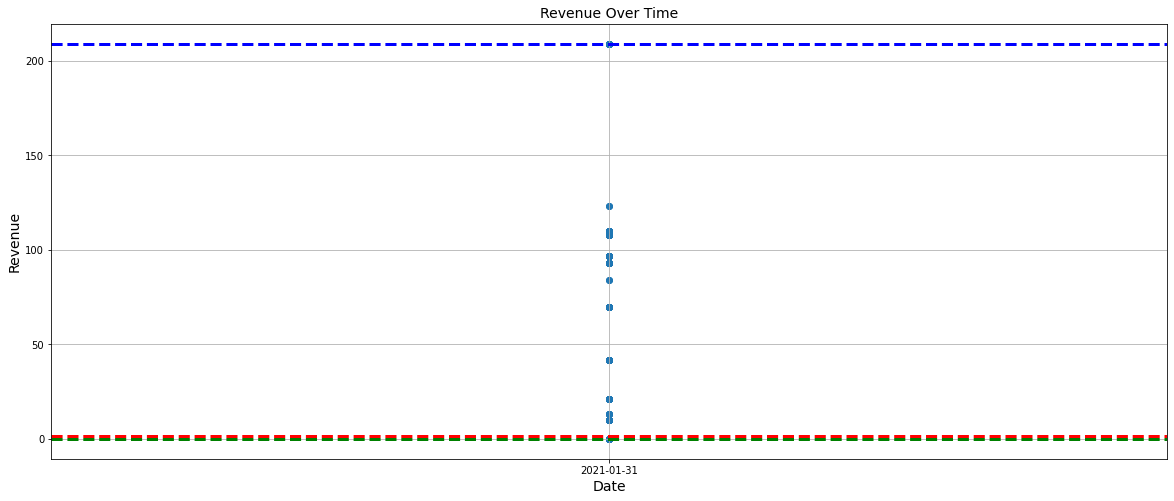

In [55]:
# plotting the trend using line graph
plt.figure(figsize=(20, 8))
plt.scatter(data['event_date'], data['revenue'])

#add horizontal line at mean,max and min value of y
plt.axhline(y=np.nanmean(data['revenue']),color='red', linestyle='--', linewidth=3, label='Avg')
plt.axhline(y=max(data['revenue']),color='blue', linestyle='--', linewidth=3, label='Max')
plt.axhline(y=min(data['revenue']),color='green', linestyle='--', linewidth=3, label='Min')

plt.title('Revenue Over Time', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid(True)
plt.show()

In [56]:
print(np.nanmean(data['revenue']))# average
print(max(data['revenue'])) #max
print(min(data['revenue'])) #min

1.515270489637208
209.0
0.0


In [57]:
data['event_date'].unique()

array(['2021-01-31'], dtype=object)

In [58]:
data.loc[data['revenue'] == max(data['revenue']), 'event_date']

3784     2021-01-31
3785     2021-01-31
3786     2021-01-31
3787     2021-01-31
3788     2021-01-31
3789     2021-01-31
3790     2021-01-31
3791     2021-01-31
3792     2021-01-31
3793     2021-01-31
3794     2021-01-31
3795     2021-01-31
3796     2021-01-31
3797     2021-01-31
3798     2021-01-31
3799     2021-01-31
3800     2021-01-31
3801     2021-01-31
3802     2021-01-31
3803     2021-01-31
3804     2021-01-31
3805     2021-01-31
3806     2021-01-31
3807     2021-01-31
3808     2021-01-31
3809     2021-01-31
3810     2021-01-31
3811     2021-01-31
3812     2021-01-31
3813     2021-01-31
3814     2021-01-31
3815     2021-01-31
3816     2021-01-31
3817     2021-01-31
3818     2021-01-31
3819     2021-01-31
3820     2021-01-31
3821     2021-01-31
3822     2021-01-31
24054    2021-01-31
24055    2021-01-31
24056    2021-01-31
24057    2021-01-31
24380    2021-01-31
24381    2021-01-31
24382    2021-01-31
24383    2021-01-31
Name: event_date, dtype: object

In [59]:
data.loc[data['revenue'] == min(data['revenue']), 'event_date']

0        2021-01-31
1        2021-01-31
2        2021-01-31
3        2021-01-31
4        2021-01-31
            ...    
26484    2021-01-31
26485    2021-01-31
26486    2021-01-31
26487    2021-01-31
26488    2021-01-31
Name: event_date, Length: 26036, dtype: object

In [60]:
data['currency'].unique() # revenue is in usd

array(['USD'], dtype=object)

From above we can conclude that over time during the day, the revenue was at it's maximum of 209 dollars on on 15:48, with no revenue generated at 15:47. This line graph does not provide us enough useful information because the timestamps consist of the same day with a slight variation in time from 15:47 to 15:48 which is just a minute long. Hence this cannot be trusted to provide us with sound information.

### Revenue Per Product Category

In [61]:
products = data.groupby('category').agg(np.mean)
products

,event_bundle_sequence_id,user_pseudo_id,user_first_touch_timestamp,stream_id,revenue,total_item_quantity,purchase_revenue_in_usd,unique_items
category,,,,,,,,
desktop,-2.436162e+07,2.002450e+08,1.611368e+15,2.100450e+09,1.966730,1.753555,0.0,6.958382
mobile,1.346675e+08,4.587778e+08,1.611198e+15,2.100450e+09,0.956984,1.088000,0.0,6.458120
tablet,-2.894222e+08,3.353767e+08,1.611889e+15,2.100450e+09,0.000000,1.000000,0.0,4.627119


In [62]:
products['revenue']

category
desktop    1.966730
mobile     0.956984
tablet     0.000000
Name: revenue, dtype: float64

In [63]:
data['platform'].unique()

array(['WEB'], dtype=object)

As seen here the average revenue from orders on the website under desktop cateogry is 1.97 dollars and 0.96 dollars for mobile cateogory. The tablet cateogry is not contributing anything to the revenue.

### Website Performance Across Operating Systems

In [64]:
os = data.groupby('operating_system').agg(np.mean)
os

,event_bundle_sequence_id,user_pseudo_id,user_first_touch_timestamp,stream_id,revenue,total_item_quantity,purchase_revenue_in_usd,unique_items
operating_system,,,,,,,,
<Other>,2.132285e+08,3.489488e+08,1.611372e+15,2.100450e+09,0.000000,1.000000,NaN,5.718750
Android,3.319043e+08,2.363165e+08,1.611616e+15,2.100450e+09,2.745902,1.379310,0.0,6.864662
Macintosh,-9.722722e+07,1.574258e+08,1.611176e+15,2.100450e+09,6.291465,1.115385,NaN,5.976526
Web,-8.656264e+06,2.735052e+08,1.611635e+15,2.100450e+09,0.535102,1.111650,0.0,6.782924
Windows,3.322069e+07,1.331415e+08,1.610498e+15,2.100450e+09,4.053727,3.509434,0.0,7.408964
iOS,8.387165e+07,8.059119e+08,1.610301e+15,2.100450e+09,0.111739,1.000000,0.0,5.969900


In [65]:
os['revenue']

operating_system
<Other>      0.000000
Android      2.745902
Macintosh    6.291465
Web          0.535102
Windows      4.053727
iOS          0.111739
Name: revenue, dtype: float64

This shows that users with macintosh operating system contribute most to the revenue generated by the website.
### Measuring Performance based on Event

In [66]:
data.columns

Index(['event_date', 'event_timestamp', 'event_name',
       'event_bundle_sequence_id', 'user_pseudo_id',
       'user_first_touch_timestamp', 'stream_id', 'platform', 'items',
       'uses_transient_token', 'revenue', 'currency', 'category',
       'mobile_brand_name', 'mobile_model_name', 'mobile_marketing_name',
       'mobile_os_hardware_model', 'operating_system',
       'operating_system_version', 'language', 'is_limited_ad_tracking',
       'browser', 'browser_version', 'medium', 'name', 'source',
       'total_item_quantity', 'purchase_revenue_in_usd', 'unique_items',
       'transaction_id', 'continent', 'sub_continent', 'country', 'region',
       'city', 'metro'],
      dtype='object')

In [67]:
event_counts = data['event_name'].value_counts()
event_counts

page_view              9498
user_engagement        5005
scroll                 2870
session_start          2760
first_visit            2127
view_item              1829
view_promotion         1190
add_to_cart             295
select_item             237
begin_checkout          234
view_search_results     198
add_shipping_info       100
select_promotion         71
add_payment_info         53
purchase                 19
click                     3
Name: event_name, dtype: int64

Here we can consider that events named begin_checkout, select_promotion and add_payment_info all lead to increased probability of the client placing the order. Here first_event shall  be used to detect any new customer traffic on the website. While view_promotion and select_promotion events can be used to see how much traffic is on the website due to the promotions. 

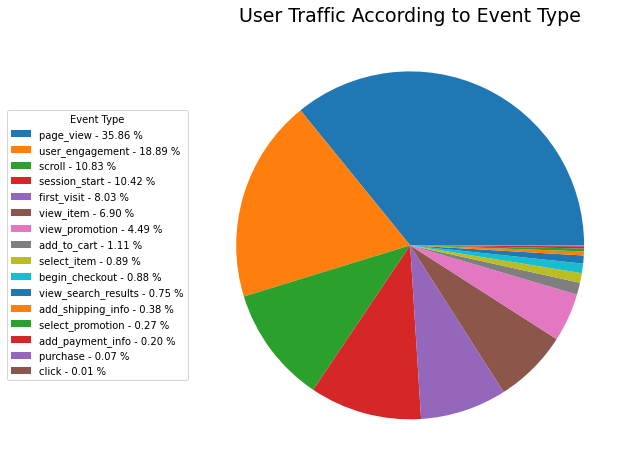

In [68]:
plt.figure(figsize=(30, 8))
y = (event_counts/event_counts.sum()) * 100
mylabels = event_counts.index
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(mylabels, y)]
plt.pie(y)
plt.legend(labels,title = "Event Type",loc='right',bbox_to_anchor=(0, 0.5))
plt.title('User Traffic According to Event Type',fontdict={'fontsize': 19})
plt.show() 

As explained above following observations can be made:
    - Only 1.35% of the users that visit the website have increased chances of making a purchase <br>
    - Of all the users, 0.08% are new customers that the store has acquired<br>
    - Due to the promotions 8.03% of the users visit the website of the store<br>
    - Only 19 users make a purchase which eventually shows that most visitors on the website do not place an order. There is only 0.07% purchases out of all the events users carry out<br>
    
## Conversion Rate Analysis
This section will judge conversion of events on the website to purchases to assess the performance of the store
### Overall Conversion rate

In [69]:
conversion_rate = event_counts['purchase']/event_counts.sum()
conversion_rate*100

0.07172788704745367

As seen above, only 19 orders were placed which makes it 0.07 percent of the users placing an order on the website
### Conversion Rates According to Location
#### Location: Continent

In [70]:
continent = data[['event_name', 'continent']].value_counts(dropna=False)
continent

event_name         continent
page_view          Americas     5130
user_engagement    Americas     2645
page_view          Asia         2353
                   Europe       1741
scroll             Americas     1499
                                ... 
select_promotion   Africa          1
scroll             (not set)       1
click              Asia            1
add_shipping_info  Oceania         1
add_payment_info   Oceania         1
Length: 81, dtype: int64

In [71]:
continent[['purchase', 'begin_checkout', 'select_promotion', 'add_payment_info']]

event_name        continent
purchase          Asia          11
                  Americas       6
                  Europe         2
begin_checkout    Americas     120
                  Asia          48
                  Europe        44
                  Africa        19
                  Oceania        3
select_promotion  Americas      38
                  Asia          19
                  Europe        12
                  Oceania        1
                  Africa         1
add_payment_info  Americas      21
                  Asia          18
                  Europe        11
                  Africa         2
                  Oceania        1
dtype: int64

In [72]:
def form_bins(locations, events):
    '''This function is a utility function that creates a list for each location with its elements representing
    [begin_checkout user count wrt location,select_promotion user count wrt location,add_payment_info user count wrt
    location]'''
    america = []
    asia=[]
    europe=[]
    africa=[]
    oceania=[]
    for i in locations:
        for j in events:
            if i == 'Americas':
                america.append(continent[j][i])
            elif i == 'Asia':
                asia.append(continent[j][i])
            elif i == 'Europe':
                europe.append(continent[j][i])
            elif i == 'Africa':
                africa.append(continent[j][i])
            else:
                oceania.append(continent[j][i])
    
    # for each location you get counts of the three events selected 
    # ex: america = [120,38,21]
    return america,asia,europe,africa,oceania

In [73]:

locations = ['Americas','Asia','Europe','Africa','Oceania']
events = ['begin_checkout', 'select_promotion', 'add_payment_info']

# Each of these lists is used to create the grouped bar chart below by segmenting user counts according to locations
america,asia,europe,africa,oceania = form_bins(locations,events)
america

[120, 38, 21]

<Figure size 1440x576 with 0 Axes>

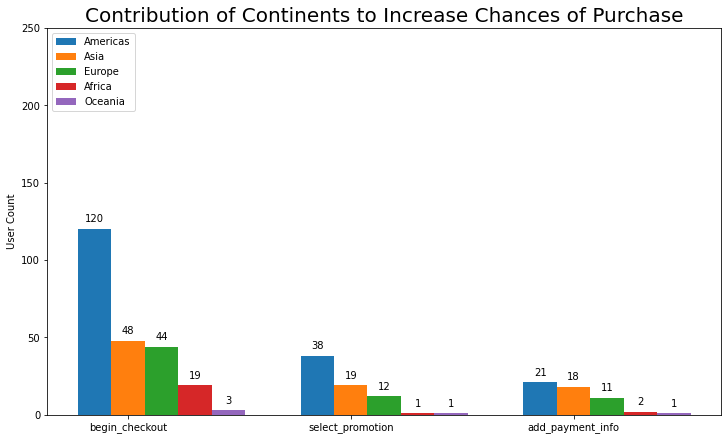

In [74]:
plt.figure(figsize=(20, 8))
locs = {
    'Americas': america,
    'Asia': asia,
    'Europe': europe,
    'Africa': africa,
    'Oceania': oceania
}

x = np.arange(len(events))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',figsize = (10,6))

for attribute, measurement in locs.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=5)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('User Count')
ax.set_title('Contribution of Continents to Increase Chances of Purchase',fontsize=20)
ax.set_xticks(x + width, events)
ax.legend(loc='upper left')
ax.set_ylim(0, 250)

plt.show()

Here it can be observed that most people in america begin to checkout which is an indicator of increased chances of making a purchase.On second, it would be Asia. It must also be noticed that Oceania and Africa are contributing almost nothing to increase chances of a purchase.

Text(0.5, 1.0, 'Contribution of Continents to Purchases')

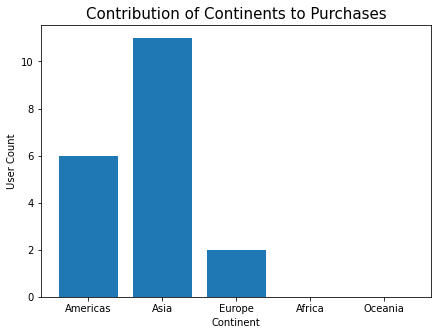

In [75]:
plt.figure(figsize=(7, 5))
counts =[6,11,2,0,0]
plt.bar(locations,counts)
plt.ylabel('User Count')
plt.xlabel('Continent')
plt.title('Contribution of Continents to Purchases',fontsize=15)


As noticeable Asia contributes the most to conversion rate and then on second is America. It can also be seen that no purchases have been made from Africa and Oceania, hence they donot contribute anything to the conversion rate

#### Location: Country

In [76]:
country = data[['event_name', 'country']].value_counts(dropna=False)
country

event_name         country      
page_view          United States    4129
user_engagement    United States    2104
session_start      United States    1198
scroll             United States    1174
first_visit        United States     904
                                    ... 
                   Uruguay             1
view_item          South Africa        1
add_shipping_info  Portugal            1
session_start      Estonia             1
add_payment_info   Australia           1
Length: 729, dtype: int64

In [77]:
country['purchase']

country
United States    5
Japan            3
Singapore        2
Iraq             2
India            2
South Korea      1
Thailand         1
Canada           1
Italy            1
Netherlands      1
dtype: int64

Text(0.5, 1.0, 'Contribution of Countries to Purchases')

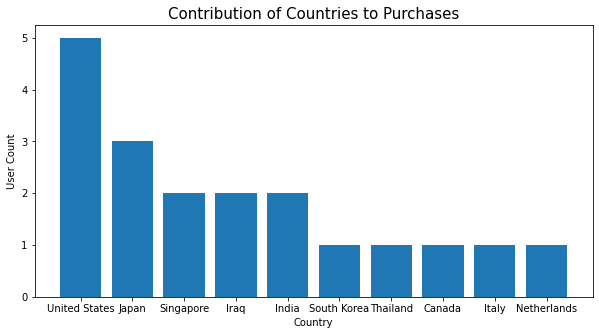

In [78]:
plt.figure(figsize=(10, 5))

plt.bar(country['purchase'].index,country['purchase'])

plt.ylabel('User Count')
plt.xlabel('Country')
plt.title('Contribution of Countries to Purchases',fontsize=15)

As observed here, customers from US purchase most products and then on second is Japan. 
#### Location: Region

In [79]:
region = data[['event_name', 'region']].value_counts(dropna=False)
region

event_name       region      
page_view        (not set)       1029
                 California       710
user_engagement  (not set)        614
page_view        Texas            437
user_engagement  California       352
                                 ... 
                 Antalya            1
first_visit      North Dakota       1
user_engagement  Berlin             1
scroll           Antalya            1
user_engagement  Brandenburg        1
Length: 2062, dtype: int64

In [80]:
region['purchase']

region
(not set)               5
Lazio                   1
Hyogo                   1
Gyeonggi-do             1
Gujarat                 1
Fukuoka                 1
Bangkok                 1
Nebraska                1
Virginia                1
Tennessee               1
Rajasthan               1
Prince Edward Island    1
North Holland           1
North Carolina          1
New York                1
dtype: int64

As observed from the data, the region with most purchases is not labelled and all other regions consist of a single purchase which does'nt contribute to our understanding of the data. Hence we donot proceed with this perspective

### Conversion Rates According to Mediums and Sources

In [81]:
data['medium'].unique()

array(['organic', '(none)', '<Other>', 'cpc', 'referral',
       '(data deleted)'], dtype=object)

Medium: Every referral to a website also has a medium. Possible medium include: “organic” (unpaid search), “cpc” (cost per click, i.e. paid search), “referral” (referral), “email” (the name of a custom medium you have created), “none” (direct traffic has a medium of “none”).

In [82]:
data['source'].unique()

array(['google', '(direct)', '<Other>', 'shop.googlemerchandisestore.com',
       '(data deleted)'], dtype=object)

Direct traffic can come from different sources:<br>
If a visitor knows your URL and enters it directly into his/her browser's address bar <br>
If a visitor has bookmarked your site or saved it as a favourite in his/her browser <br>
If a visitor clicks on a link contained in an email (the URL has been shared by a third person.<br>

In [83]:
medium = data[['event_name', 'medium']].value_counts(dropna=False)
medium

event_name        medium        
page_view         organic           3077
                  (none)            2447
                  referral          1638
user_engagement   organic           1540
                  (none)            1375
                                    ... 
click             referral             1
first_visit       (data deleted)       1
purchase          referral             1
select_promotion  (data deleted)       1
click             <Other>              1
Length: 92, dtype: int64

In [84]:
medium['purchase']

medium
(none)            7
organic           5
<Other>           4
(data deleted)    2
referral          1
dtype: int64

It can be observed that the purchases made on the website were majorly organic but comparitively other mediums also seem to play an eqivalent part in brining in the orders.

In [85]:
source = data[['event_name', 'source']].value_counts(dropna=False)
source

event_name       source                         
page_view        google                             3338
                 (direct)                           2447
                 <Other>                            2353
user_engagement  google                             1669
                 (direct)                           1375
                                                    ... 
purchase         shop.googlemerchandisestore.com       1
first_visit      (data deleted)                        1
click            shop.googlemerchandisestore.com       1
                 google                                1
                 <Other>                               1
Length: 78, dtype: int64

In [86]:
source['purchase']

source
(direct)                           7
google                             5
<Other>                            4
(data deleted)                     2
shop.googlemerchandisestore.com    1
dtype: int64

As observed most purchases are made through direct sources which is also an indicator of regular and loyal customers of the store. Second is google which is also equivalent to organic traffic that is through a search engine and naturally earned. Hence we can conclude that the conversion rate is boosted through purchases made by organic and direct sources.

## User Traffic/Engagement Analysis

In [87]:
data['medium'].value_counts()

organic           8538
(none)            7064
referral          4368
<Other>           3709
(data deleted)    1448
cpc               1362
Name: medium, dtype: int64

Text(0.5, 1.0, 'User Traffic From Different Mediums')

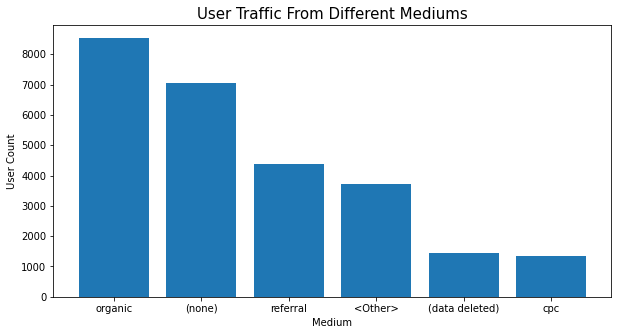

In [88]:
plt.figure(figsize=(10, 5))

plt.bar(data['medium'].value_counts().index,data['medium'].value_counts())

plt.ylabel('User Count')
plt.xlabel('Medium')
plt.title('User Traffic From Different Mediums',fontsize=15)

In [89]:
# percentage of users that come by reference
data['medium'].value_counts()['referral']/data['medium'].value_counts().sum() * 100

16.48986371701461

In [90]:
# percentage of users that come through paid ads
data['medium'].value_counts()['cpc']/data['medium'].value_counts().sum() * 100

5.141756955717468

As obseved, most users that engage on the website are organic users while only 16.5% users visit the website through referral.It is also significant to note that only 5.14% of the traffic on the website is due to cost per click ads, hence indicating that the advertising strategy of the store is not able to bring customers let alone purchases. 

In [91]:
src = data['source'].value_counts()
src

google                             9261
(direct)                           7064
<Other>                            6578
shop.googlemerchandisestore.com    2149
(data deleted)                     1437
Name: source, dtype: int64

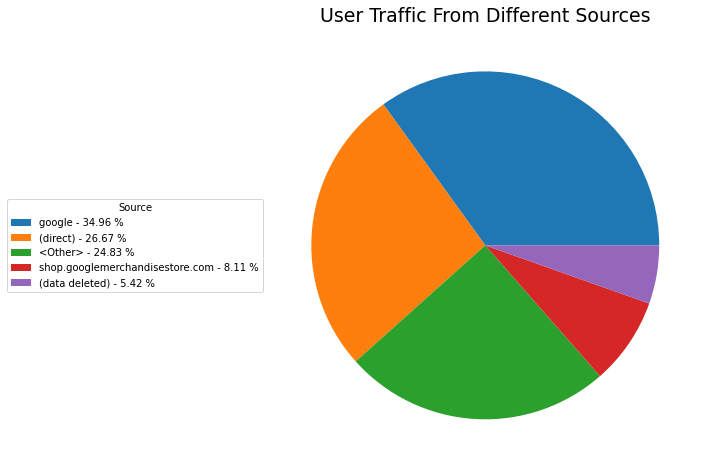

In [92]:
plt.figure(figsize=(30, 8))
y = (src/src.sum())*100
mylabels = src.index
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(mylabels, y)]
plt.pie(y)
plt.legend(labels,title = "Source",loc='right',bbox_to_anchor=(0, 0.5))
plt.title('User Traffic From Different Sources',fontdict={'fontsize': 19})
plt.show() 

As observed most people access the website through direct and organic sources like google which is a search engine

## Mobile Optimization
Mobile optimization refers to the process of designing and adapting a website, application, or digital content to provide an optimal and seamless user experience on mobile devices, such as smartphones and tablets. It involves optimizing the layout, design, functionality, and performance of the digital asset to ensure it is easily accessible, usable, and visually appealing on smaller screens with touch-based interactions.<br><br>
Here we will analyse data to see what needs to be done when it comes to mobile optimization

In [93]:
data['mobile_brand_name'].unique() #all available brand categories

array(['Apple', 'Google', '<Other>', 'Microsoft', 'Xiaomi', 'Samsung',
       'Mozilla', 'Huawei'], dtype=object)

In [94]:
data['mobile_marketing_name'].unique()

array(['<Other>'], dtype=object)

In [95]:
data['mobile_model_name'].unique()

array(['iPhone', 'Chrome', '<Other>', 'Edge', 'Safari', 'ChromeBook',
       'Firefox', 'Pixel 4 XL', 'iPad', 'Pixel 3'], dtype=object)

In [96]:
data['mobile_os_hardware_model'].unique()

array([None], dtype=object)

This reveals that mobile_model_name and mobile_brand_name columns can be used to look for user traffic

In [97]:
mob = data['mobile_brand_name'].value_counts()
mob

Apple        11272
Google        8973
<Other>       2163
Samsung       1893
Microsoft      822
Xiaomi         640
Huawei         388
Mozilla        338
Name: mobile_brand_name, dtype: int64

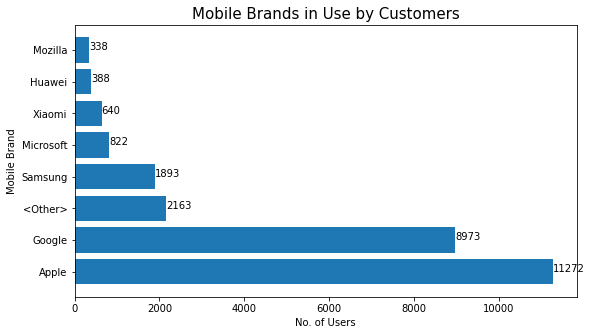

In [98]:
plt.figure(figsize=(9, 5))
# Plot horizontal bar chart
bars = plt.barh(mob.index,mob)

# To get data labels
for  bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')

# Define axes labels
plt.xlabel("No. of Users")
plt.ylabel("Mobile Brand")
plt.title('Mobile Brands in Use by Customers',fontdict={'fontsize': 15})

# Display a bar chart   
plt.show()

As observed most customers own mobile phone of Apple and at Second of Google. Hence, it is important to invest in mobile optimization of website for users with phones from these brands 

In [99]:
mod = data['mobile_model_name'].value_counts()
mod

Chrome        7351
<Other>       5495
Safari        5442
iPhone        5441
ChromeBook    1022
Edge           791
iPad           389
Firefox        338
Pixel 4 XL     159
Pixel 3         61
Name: mobile_model_name, dtype: int64

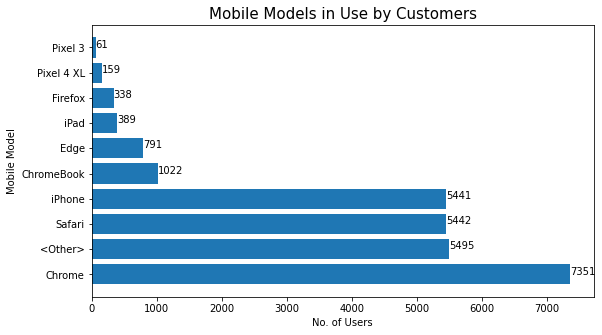

In [100]:
plt.figure(figsize=(9, 5))
# Plot horizontal bar chart
bars = plt.barh(mod.index,mod)

# To get data labels
for  bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')

# Define axes labels
plt.xlabel("No. of Users")
plt.ylabel("Mobile Model")
plt.title('Mobile Models in Use by Customers',fontdict={'fontsize': 15})

# Display a bar chart   
plt.show()

As observed most customers use chrome to access the website, hence most investment should be directed towards optimizing website for chrome users. Secondly, Safari and iPhone users also need attention in order to direct more customers to the website because as it was seen earlier most customers own Apple phones.This will be a great way to generate more traffic and eventually increasing chances of purchase.